## TIỀN XỬ LÝ DỮ LIỆU

In [5]:
import pandas as pd
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [6]:
# Load the data
data = pd.read_csv('../DATA/ObesityDataSet_raw_and_data_sinthetic.csv', header=0)
data.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [7]:
# Meaning of the features
dictionary = {
    "Column Name": ["Gender", "Age", "Height", "Weight", 
                    "family_history_with_overweight", "FAVC", "FCVC", "NCP", "CAEC", "SMOKE", "CH2O",
                    "SCC", "FAF", "TUE", "CALC", "MTRANS", "NObeyesdad"
                    ],
    "Type": ["Feature, Categorical", "Feature, Continuous", "Feature, Continuous", 
             "Feature, Continuous", "Feature, Binary", "Feature, Binary", 
             "Feature, Integer", "Feature, Continuous", "Feature, Categorical", "Feature, Binary",
             "Feature, Continuous", "Feature, Binary", "Feature, Continuous", "Feature, Integer", 
             "Feature, Categorical", "Feature, Categorical", "Target, Categorical"],
    "Description": [
        "Gender",
        "Age",
        "Height",
        "Weight",
        "Has a family member suffered or suffers from overweight?",
        "Do you eat high caloric food frequently?",
        "Do you usually eat vegetables in your meals?",
        "How many main meals do you have daily?",
        "Do you eat any food between meals?",
        "Do you smoke?",
        "How much water do you drink daily?",
        "Do you monitor the calories you eat daily?",
        "How often do you have physical activity?",
        "How much time do you use technological devices such as cell phone, videogames, television, computer and others?",
        "How often do you drink alcohol?",
        "Which transportation do you usually use?",
        "Obesity level"
    ]
}
df_dict = pd.DataFrame(dictionary)
print(tabulate(df_dict, headers="keys"))

    Column Name                     Type                  Description
--  ------------------------------  --------------------  ---------------------------------------------------------------------------------------------------------------
 0  Gender                          Feature, Categorical  Gender
 1  Age                             Feature, Continuous   Age
 2  Height                          Feature, Continuous   Height
 3  Weight                          Feature, Continuous   Weight
 4  family_history_with_overweight  Feature, Binary       Has a family member suffered or suffers from overweight?
 5  FAVC                            Feature, Binary       Do you eat high caloric food frequently?
 6  FCVC                            Feature, Integer      Do you usually eat vegetables in your meals?
 7  NCP                             Feature, Continuous   How many main meals do you have daily?
 8  CAEC                            Feature, Categorical  Do you eat any food between mea

In [8]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [9]:
# Số lượng các giá trị khác nhau của các features
unique_values = data.nunique()
print(unique_values)

Age                               1402
Gender                               2
Height                            1574
Weight                            1525
CALC                                 4
FAVC                                 2
FCVC                               810
NCP                                635
SCC                                  2
SMOKE                                2
CH2O                              1268
family_history_with_overweight       2
FAF                               1190
TUE                               1129
CAEC                                 4
MTRANS                               5
NObeyesdad                           7
dtype: int64


In [10]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Tạo bản sao dữ liệu để tránh ảnh hưởng dữ liệu gốc
data_encoded = data.copy()

# Label Encoding cho các cột Binary và Target
binary_columns = ['FAVC', 'FCVC', 'NCP', 'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE']
label_encoder = LabelEncoder()

for col in binary_columns + ['NObeyesdad']:
    data_encoded[col] = label_encoder.fit_transform(data_encoded[col])

# One-Hot Encoding cho các cột Nominal
nominal_columns = ['Gender', 'CAEC', 'CALC', 'MTRANS']
data_encoded = pd.get_dummies(data_encoded, columns=nominal_columns, drop_first=True)

# Kiểm tra dữ liệu đã mã hóa
print(data_encoded.head())
print(data_encoded.columns)

    Age  Height  Weight  FAVC  FCVC  NCP  SCC  SMOKE  CH2O  \
0  21.0    1.62    64.0     0   170  477    0      0   549   
1  21.0    1.52    56.0     0   809  477    1      1  1267   
2  23.0    1.80    77.0     0   170  477    0      0   549   
3  27.0    1.80    87.0     0   809  477    0      0   549   
4  22.0    1.78    89.8     0   170    0    0      0   549   

   family_history_with_overweight  ...  CAEC_Frequently  CAEC_Sometimes  \
0                               1  ...            False            True   
1                               1  ...            False            True   
2                               1  ...            False            True   
3                               0  ...            False            True   
4                               0  ...            False            True   

   CAEC_no  CALC_Frequently  CALC_Sometimes  CALC_no  MTRANS_Bike  \
0    False            False           False     True        False   
1    False            False           

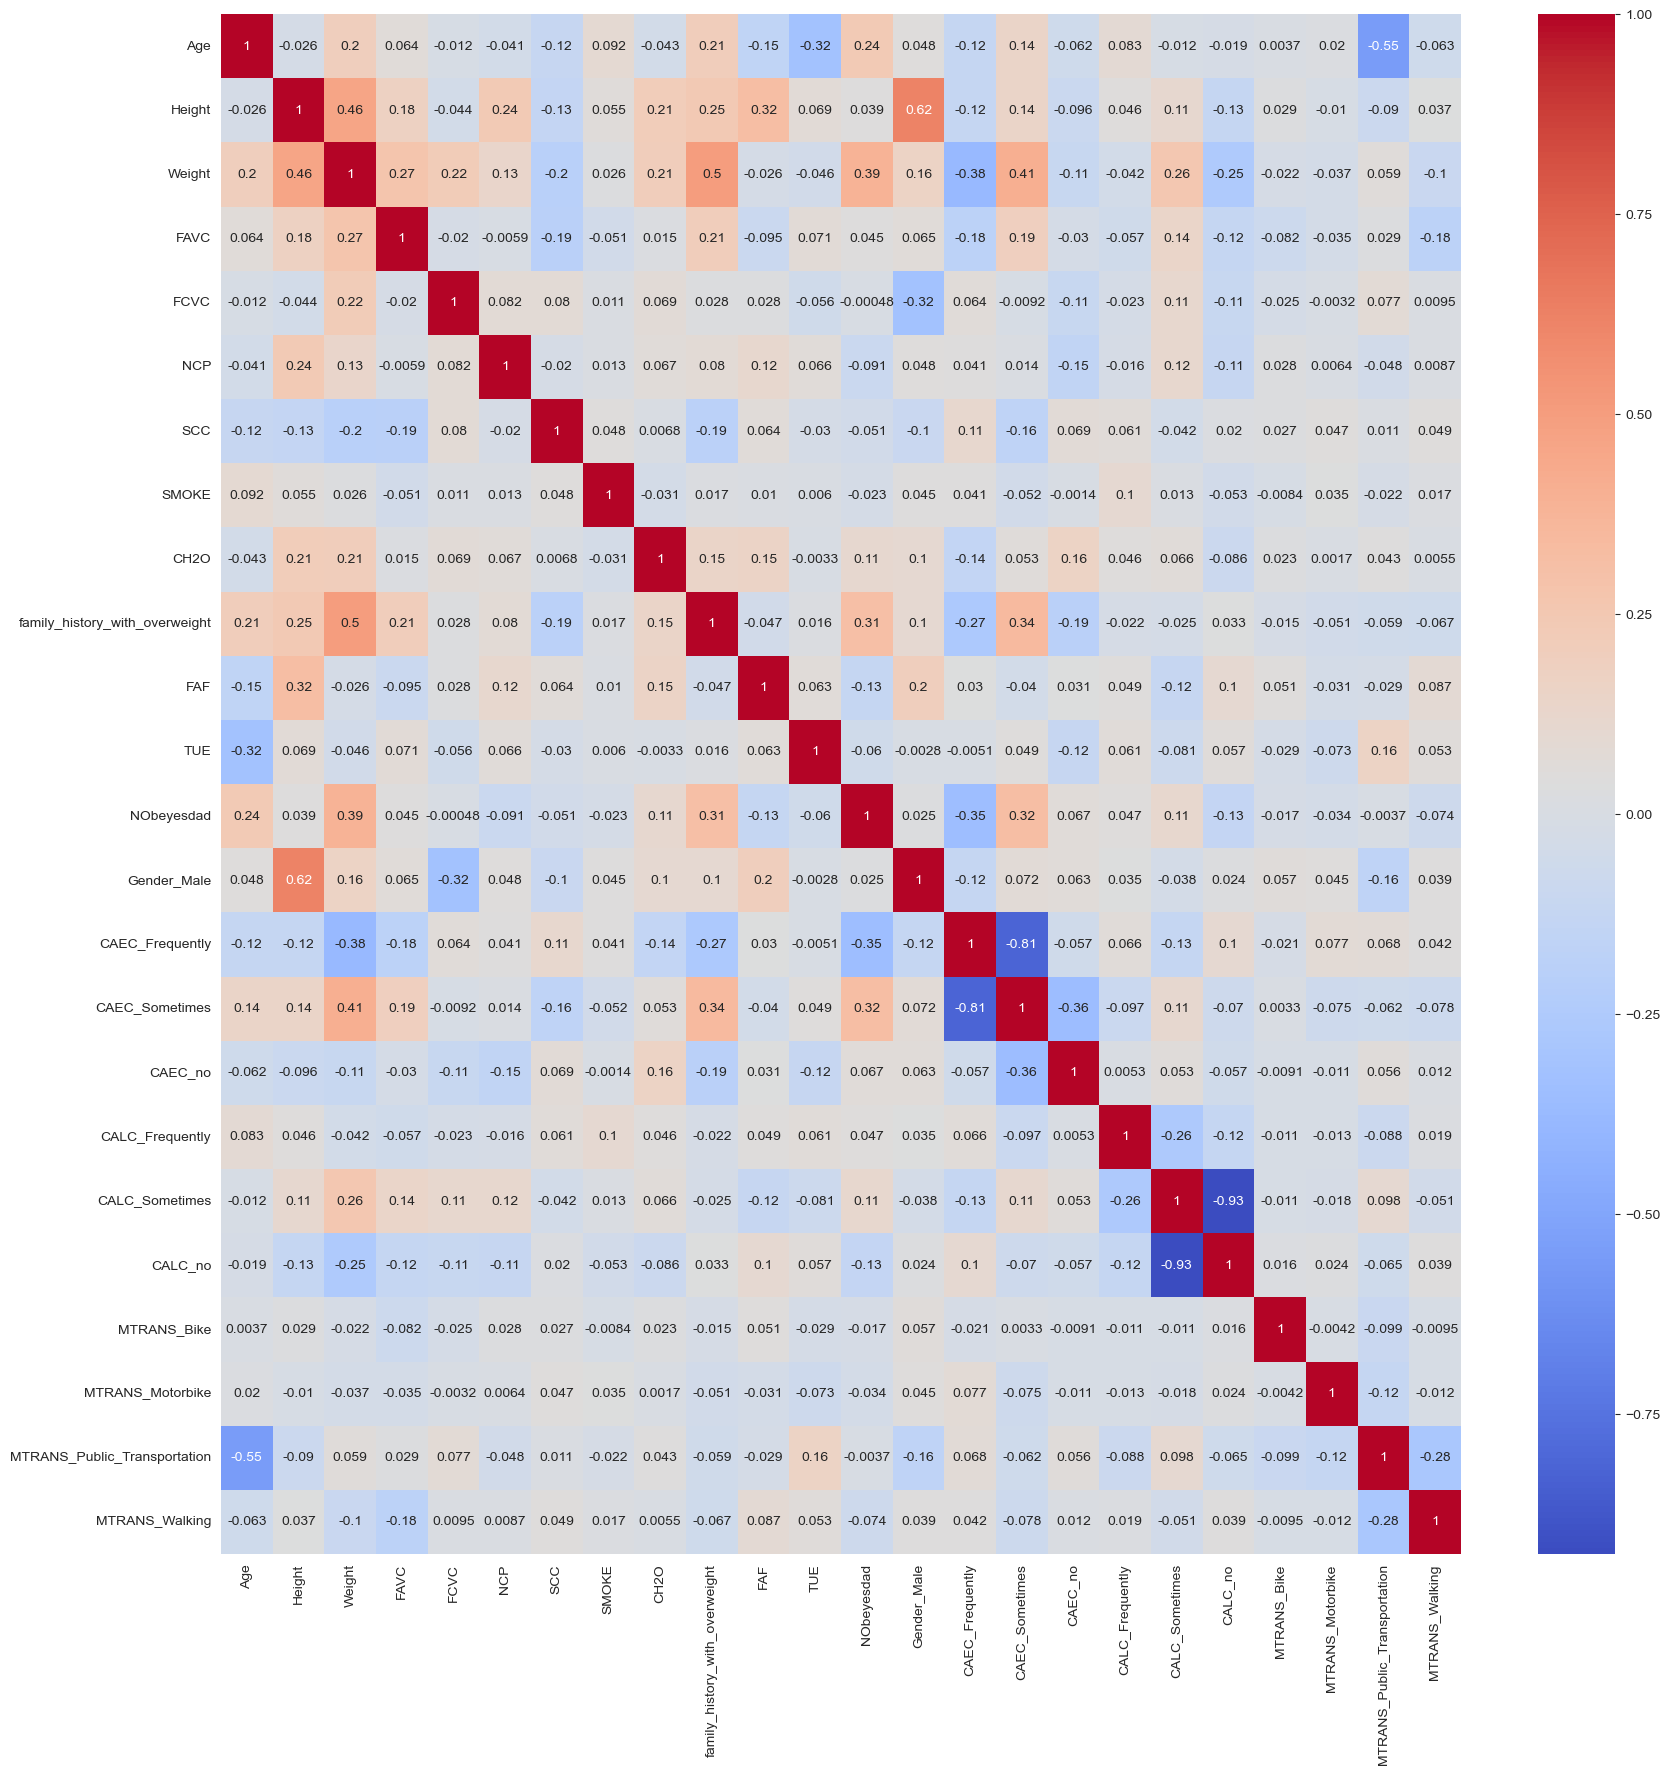

                                     Age    Height    Weight      FAVC  \
Age                             1.000000 -0.025958  0.202560  0.063902   
Height                         -0.025958  1.000000  0.463136  0.178364   
Weight                          0.202560  0.463136  1.000000  0.272300   
FAVC                            0.063902  0.178364  0.272300  1.000000   
FCVC                           -0.012370 -0.044378  0.224319 -0.019568   
NCP                            -0.040875  0.235116  0.133162 -0.005875   
SCC                            -0.116283 -0.133753 -0.201906 -0.190658   
SMOKE                           0.091987  0.055499  0.025746 -0.050660   
CH2O                           -0.042917  0.211178  0.210149  0.014723   
family_history_with_overweight  0.205725  0.247684  0.496820  0.208036   
FAF                            -0.152204  0.319018 -0.026328 -0.095185   
TUE                            -0.318619  0.068862 -0.045749  0.071168   
NObeyesdad                      0.2361

In [11]:
# correlation matrix and save the image of the correlation matrix
corr = data_encoded.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.savefig('Img\\correlation_matrix_1.png')  
plt.show()
# print the correlation matrix
print(corr)


# in ra cột tương quan của các cột với cột NObeyesdad
print(corr['NObeyesdad'])

In [12]:
X = data_encoded.drop('NObeyesdad', axis=1)
y = data_encoded['NObeyesdad']
y = y.to_numpy()

In [13]:
X.head()

,Age,Height,Weight,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,...,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,0,170,477,0,0,549,1,...,False,True,False,False,False,True,False,False,True,False
1,21.0,1.52,56.0,0,809,477,1,1,1267,1,...,False,True,False,False,True,False,False,False,True,False
2,23.0,1.80,77.0,0,170,477,0,0,549,1,...,False,True,False,True,False,False,False,False,True,False
3,27.0,1.80,87.0,0,809,477,0,0,549,0,...,False,True,False,True,False,False,False,False,False,True
4,22.0,1.78,89.8,0,170,0,0,0,549,0,...,False,True,False,False,True,False,False,False,True,False


In [14]:
X.shape

(2111, 23)

In [15]:
y

array([1, 1, 1, ..., 4, 4, 4])

In [16]:
len(y)

2111

In [17]:
# Lưu dữ liệu sau khi mã hóa sang file csv

X.to_csv('DATA\\X_data.csv', index=False)
pd.DataFrame(y).to_csv('../DATA/y_data.csv', index=False)

In [18]:
# save data to csv
data_encoded.to_csv('DATA\\ObesityDataSet_encoded.csv', index=False)